<h1 align=center> Gender Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
data = pd.read_csv('./gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
le = LabelEncoder()

In [6]:
data['gender'] = le.fit_transform(data['gender'])

In [7]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [8]:
x = data.iloc[:,:-1].values

In [9]:
y = data.iloc[:,-1].values

In [10]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(x)

In [12]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [13]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("Cross validation model :{}".format(name))
    print("Mean score: ",np.mean(scores)*100)
    print("*"*100)

Cross validation model :LogisticRegression
Mean score:  96.80103792415171
****************************************************************************************************
Cross validation model :DecisionTreeClassifier
Mean score:  96.36111776447105
****************************************************************************************************
Cross validation model :RandomForestClassifier
Mean score:  97.10095808383234
****************************************************************************************************
Cross validation model :AdaBoostClassifier
Mean score:  97.4007984031936
****************************************************************************************************
Cross validation model :GradientBoostingClassifier
Mean score:  97.40075848303394
****************************************************************************************************
Cross validation model :KNeighborsClassifier
Mean score:  96.60107784431136
**********************************

Selecting adaboost classifier

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
model = AdaBoostClassifier()

In [16]:
model.fit(x_train, y_train)
print("Model trained with AdaBoosting Classifier")
score_train = accuracy_score(y_train, model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model trained with AdaBoosting Classifier
Model accuracy on train is: 0.976
Model accuracy on test is : 0.967032967032967
confusion_matrix train is: [[1952   31]
 [  65 1952]]
Confusion_matrix test is [[504  14]
 [ 19 464]]
wrong predictions made: (33, '/', 1001)


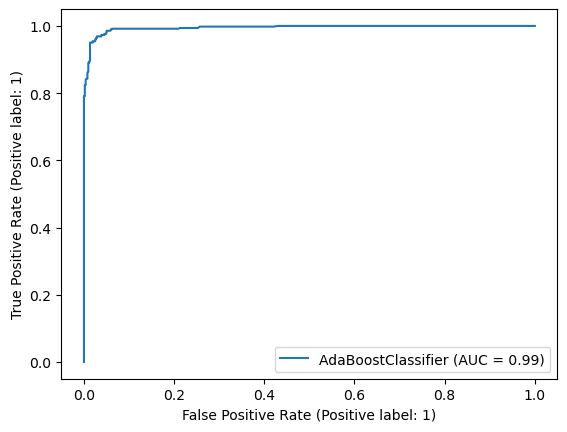

In [17]:
ROC_display = RocCurveDisplay.from_estimator(model,x_test,y_test)